In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv("../data/logfile-network-v7.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,id,type,role,level,bandwidth,total_used_bandwidth,traffic_history,ports,duration,active_duration,power_per_port,low_power,high_power,is_active,Unnamed: 16
0,0,Datacenter_1,0,switch,access switch,0,360000,2427.0,162.0:93.0:71.0:72.0:79.0:73.0:71.0:71.0:73.0:...,"400,True,0.24269999999999994,0,12,10000,2427.0...",3.6094,0.006742,8,132,132,True,NaN
1,0,Datacenter_1,1,switch,access switch,0,360000,3573.0,89.0:89.0:95.0:198.0:218.0:156.0:90.0:109.0:17...,"402,True,0.35729999999999995,1,12,10000,3573.0...",3.6094,0.009925,8,132,132,True,NaN
2,0,Datacenter_1,2,switch,access switch,0,360000,2492.0,94.0:68.0:73.0:61.0:73.0:83.0:74.0:63.0:73.0:7...,"404,True,0.24919999999999998,2,12,10000,2492.0...",3.6094,0.006922,8,132,132,True,NaN
3,0,Datacenter_1,3,switch,access switch,0,360000,2335.0,64.0:64.0:64.0:73.0:74.0:64.0:74.0:74.0:56.0:6...,"406,True,0.23349999999999999,3,12,10000,2335.0...",3.6094,0.006486,8,132,132,True,NaN
4,0,Datacenter_1,4,switch,access switch,0,360000,2436.0,70.0:64.0:57.0:75.0:72.0:65.0:75.0:66.0:63.0:7...,"408,True,0.24359999999999996,4,12,10000,2436.0...",3.6094,0.006767,8,132,132,True,NaN


Datacenter_1 transmits 1200.0 of data through the network.


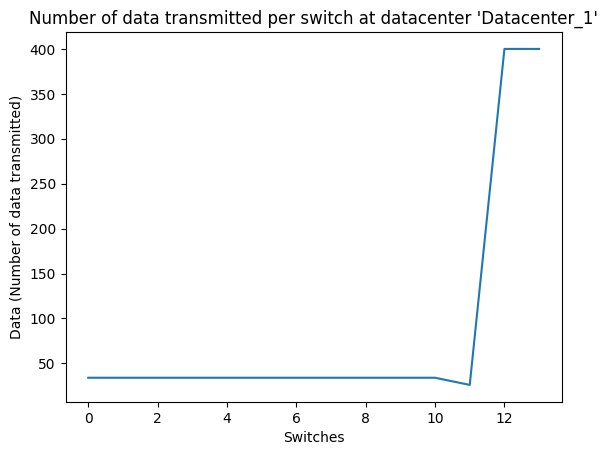

Datacenter_2 transmits 555.0 of data through the network.


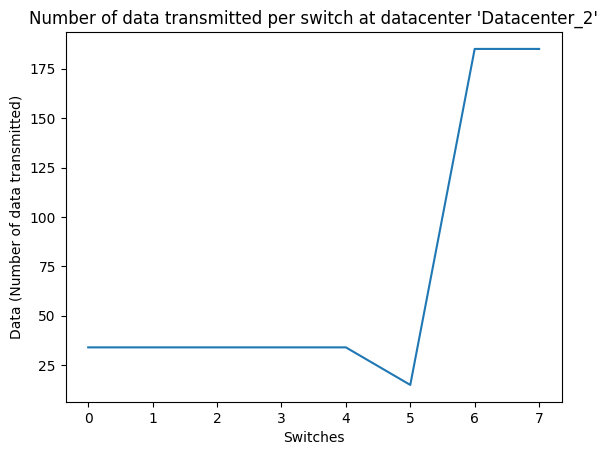

Datacenter_3 transmits 570.0 of data through the network.


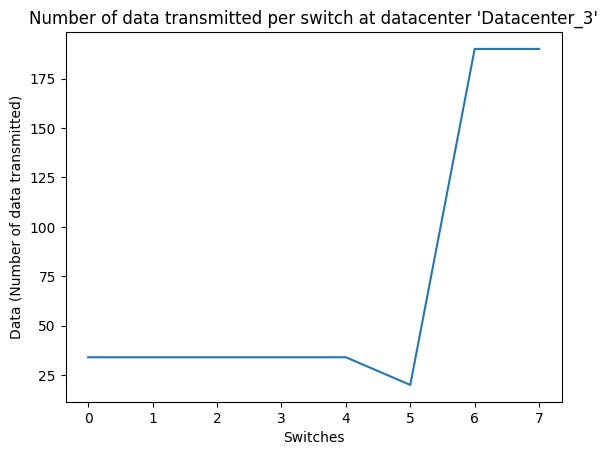

Datacenter_4 transmits 825.0 of data through the network.


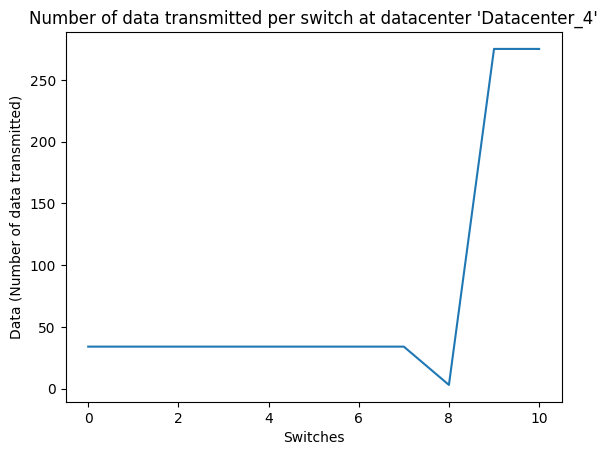

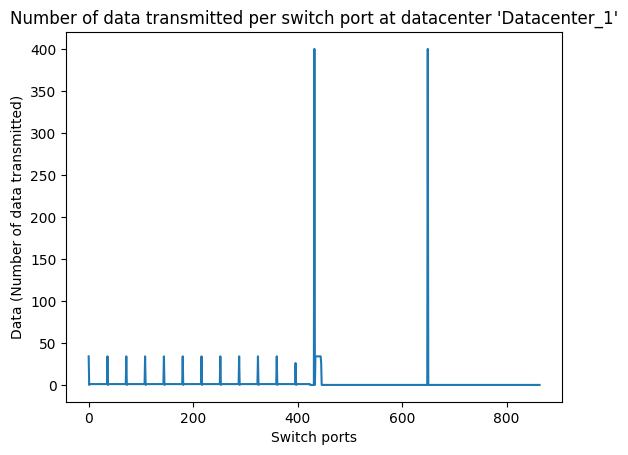

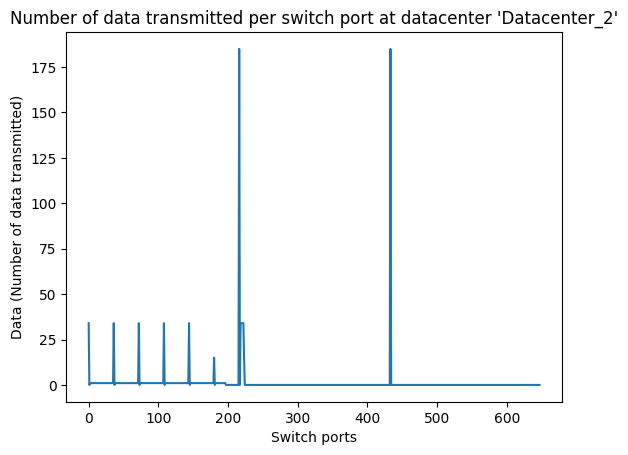

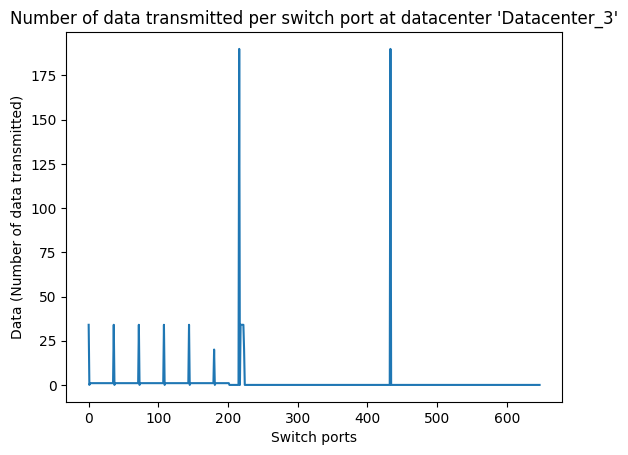

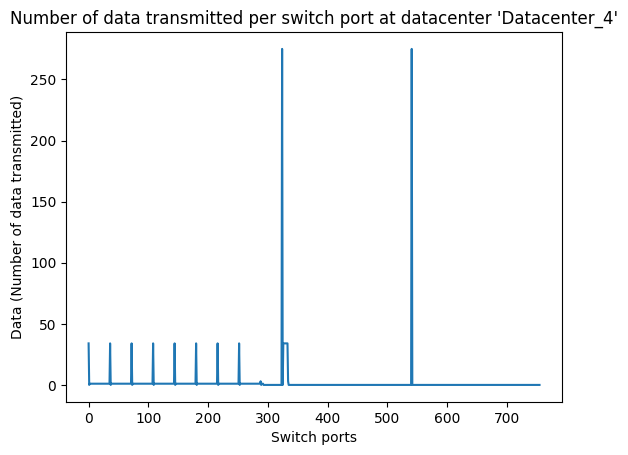

Cloud provider transmits 3150.0 of data through its network.


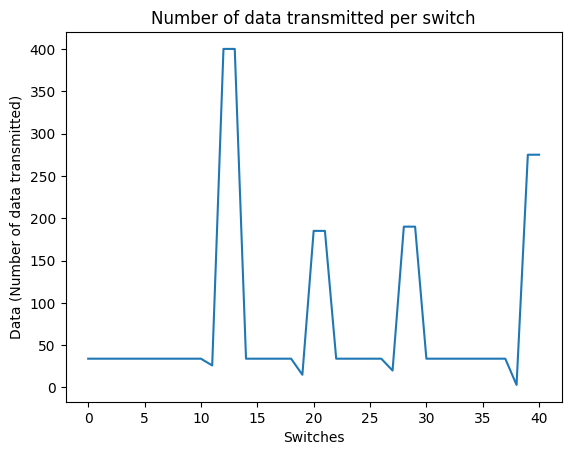

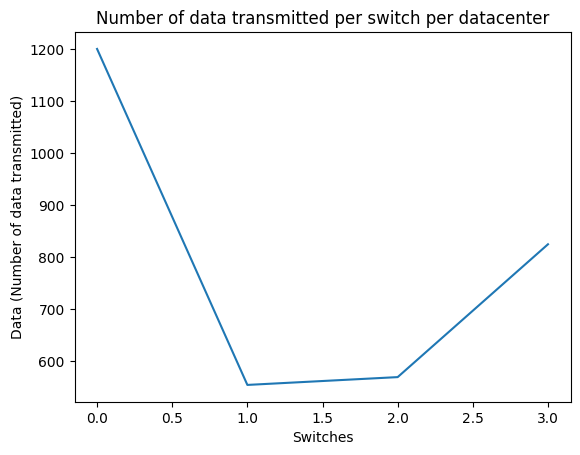

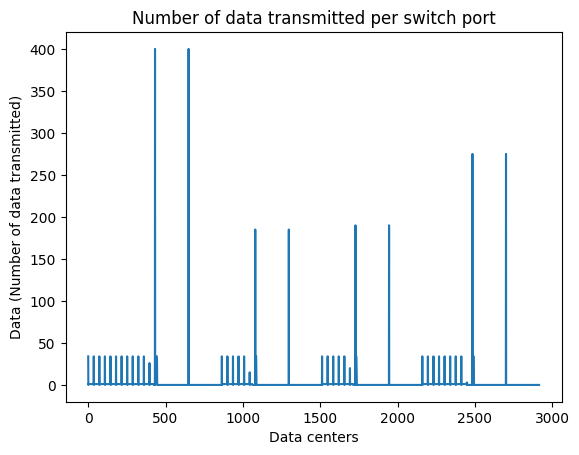

In [2]:
labels = np.unique(dataset['datacenter_name'])

# Switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmits {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per switch")
    plt.xlabel("Switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per switch at datacenter '{datacenter_name}'")
    plt.show()

# Switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[dataset['datacenter_name'] == datacenter_name].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[7].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per switch port")
    plt.xlabel("Switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per switch port at datacenter '{datacenter_name}'")
    plt.show()

# Switch
print(f"Cloud provider transmits {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per switch")
plt.xlabel("Switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch")
plt.show()

plt.plot(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per switch")
plt.xlabel("Switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch per datacenter")
plt.show()

# Switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per switch port")
plt.show()

#### Access switches

Datacenter_1 transmitts 400.0 of data through the network.


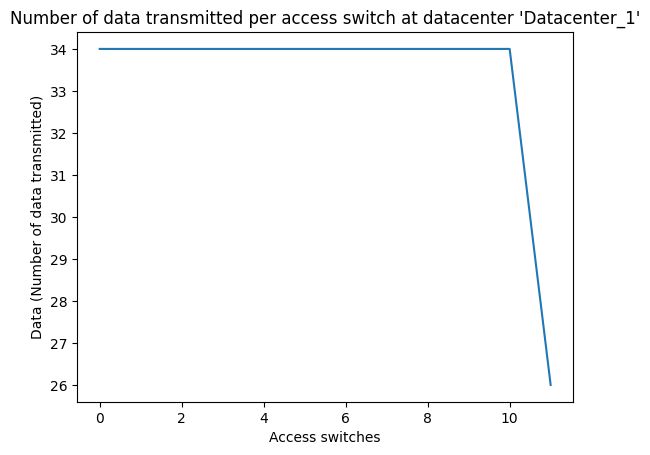

Datacenter_2 transmitts 185.0 of data through the network.


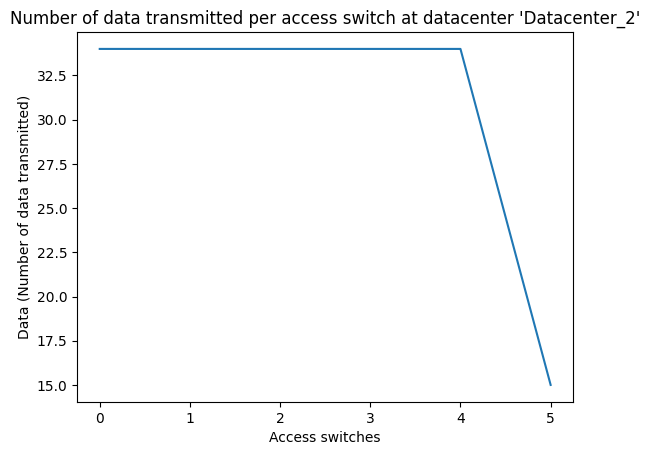

Datacenter_3 transmitts 190.0 of data through the network.


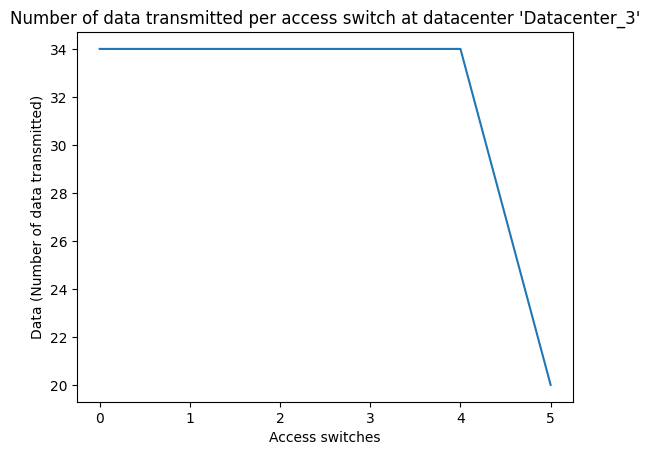

Datacenter_4 transmitts 275.0 of data through the network.


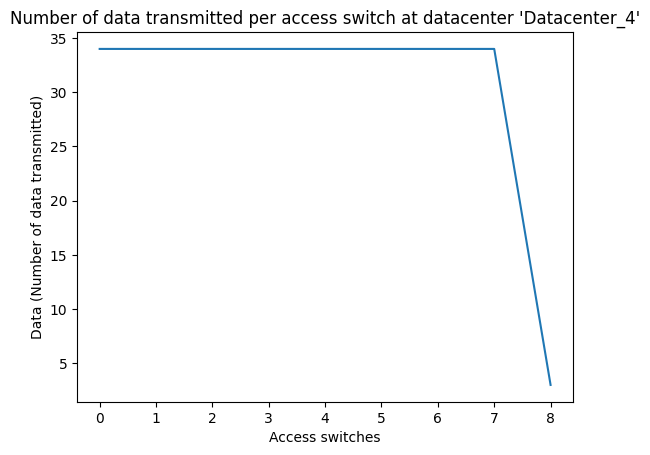

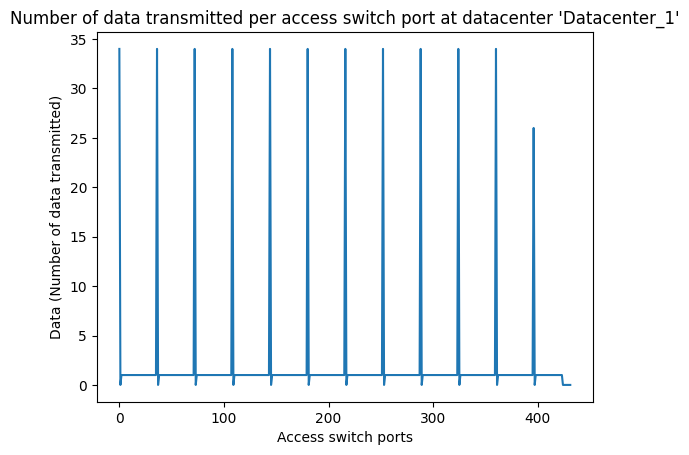

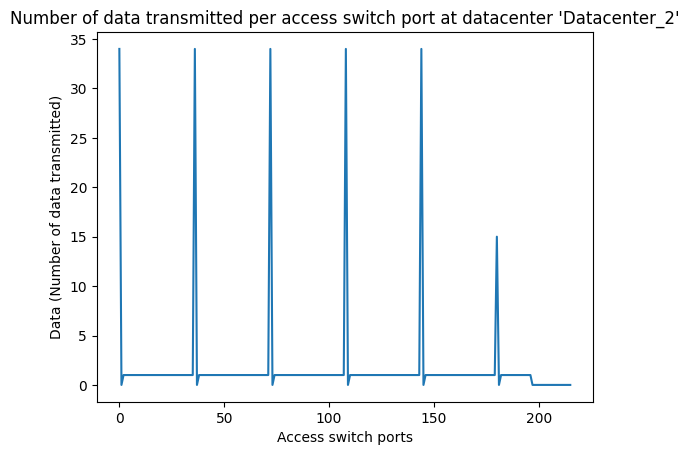

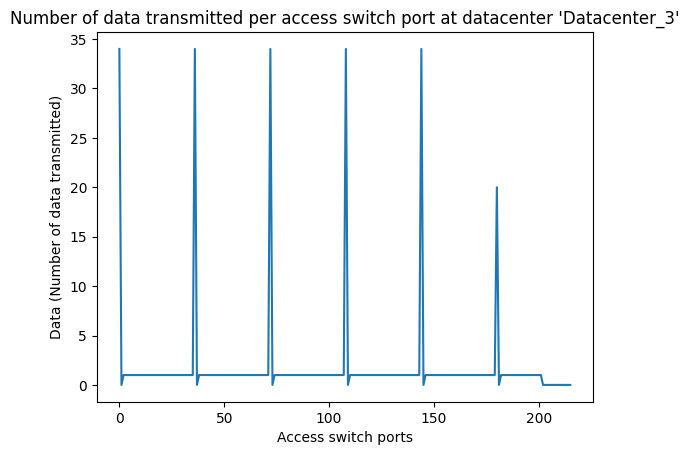

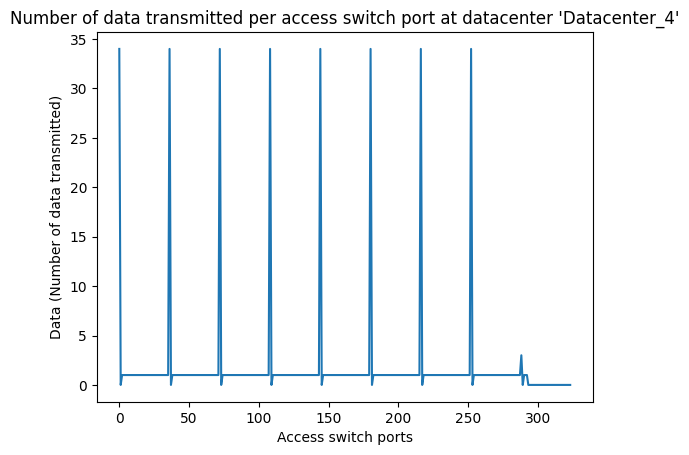

Cloud provider transmitts 1050.0 of data through its network.


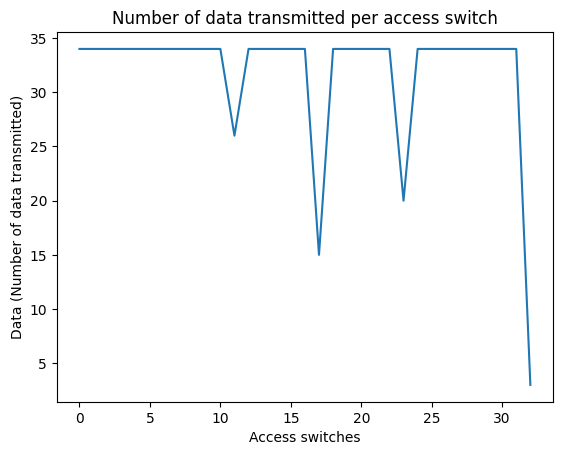

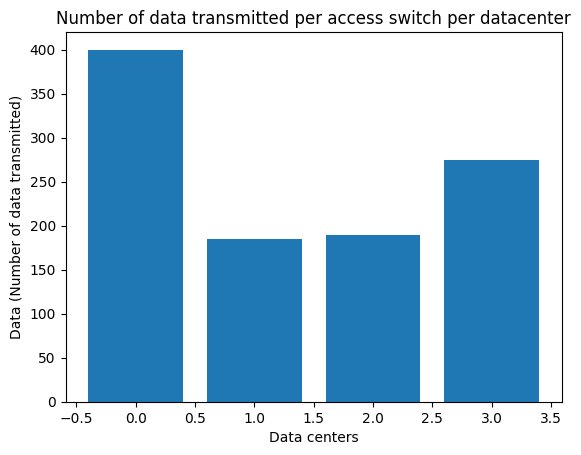

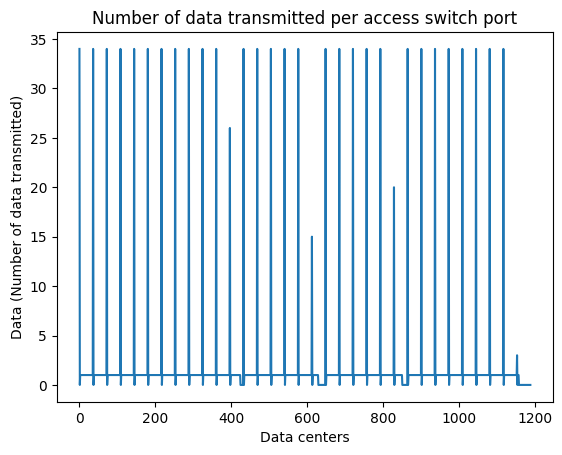

In [3]:
labels = np.unique(dataset['datacenter_name'])

# Access switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "access switch")].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per access switch")
    plt.xlabel("Access switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per access switch at datacenter '{datacenter_name}'")
    plt.show()

# Access switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "access switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[7].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per access switch port")
    plt.xlabel("Access switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per access switch port at datacenter '{datacenter_name}'")
    plt.show()

# Access switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per access switch")
plt.xlabel("Access switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per access switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch per datacenter")
plt.show()

# Access switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per access switch port")
plt.show()

#### Distribution switches

Datacenter_1 transmitts 400.0 of data through the network.


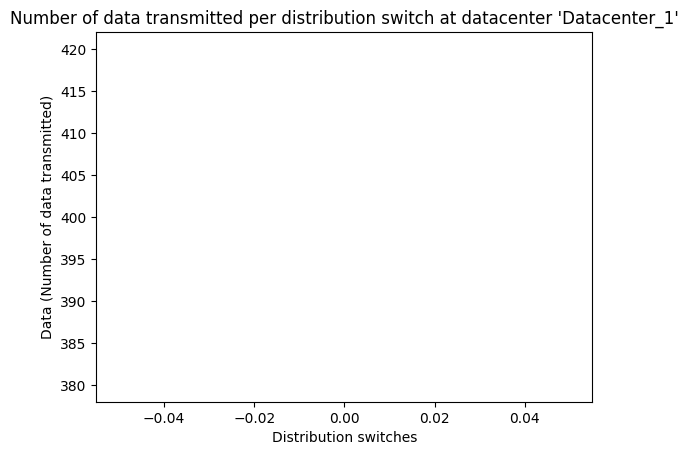

Datacenter_2 transmitts 185.0 of data through the network.


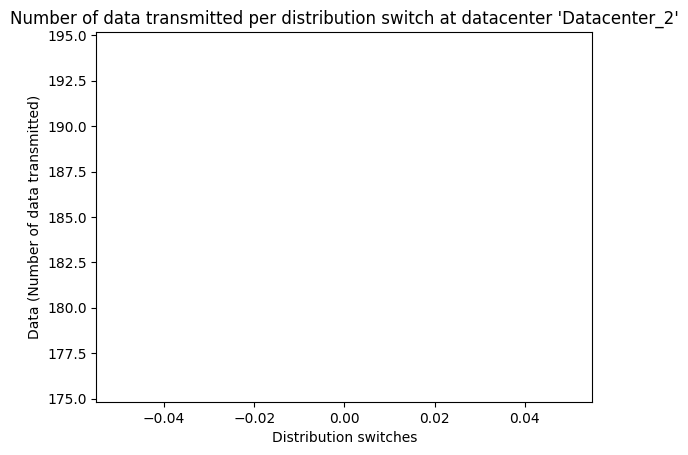

Datacenter_3 transmitts 190.0 of data through the network.


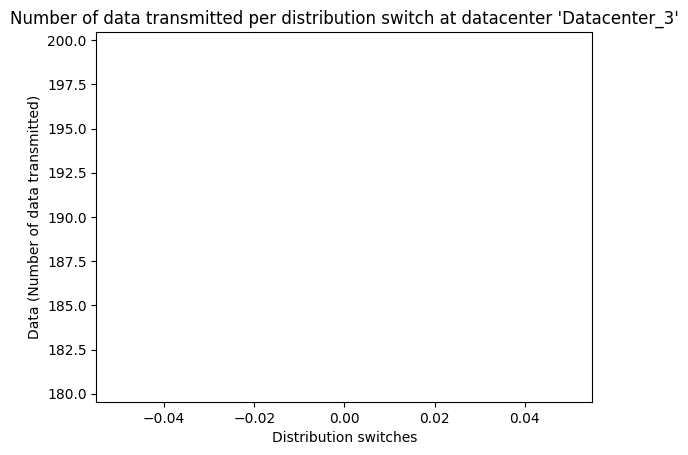

Datacenter_4 transmitts 275.0 of data through the network.


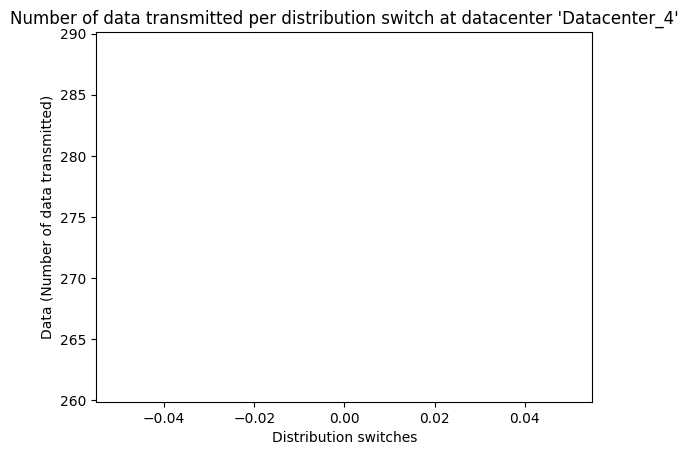

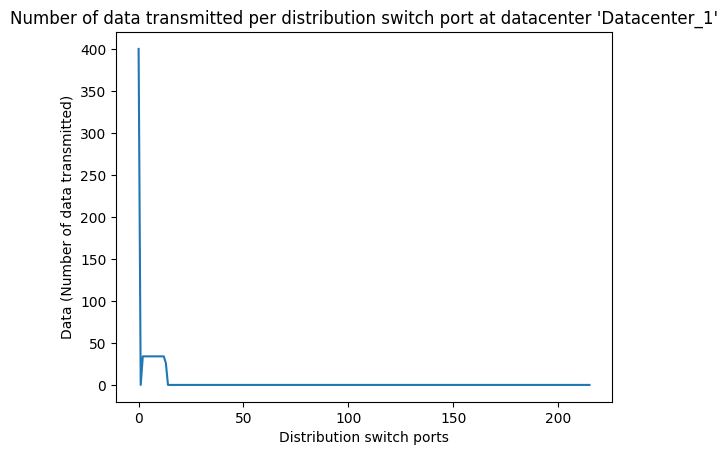

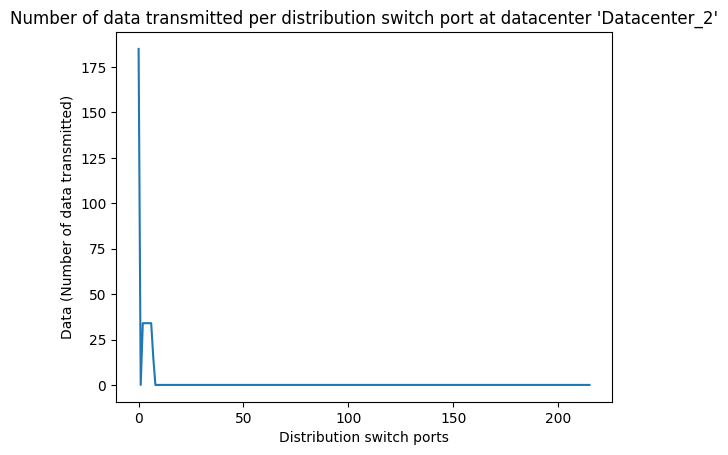

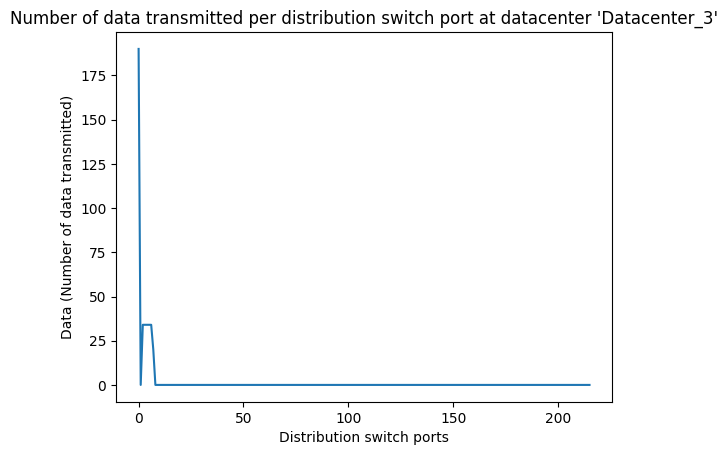

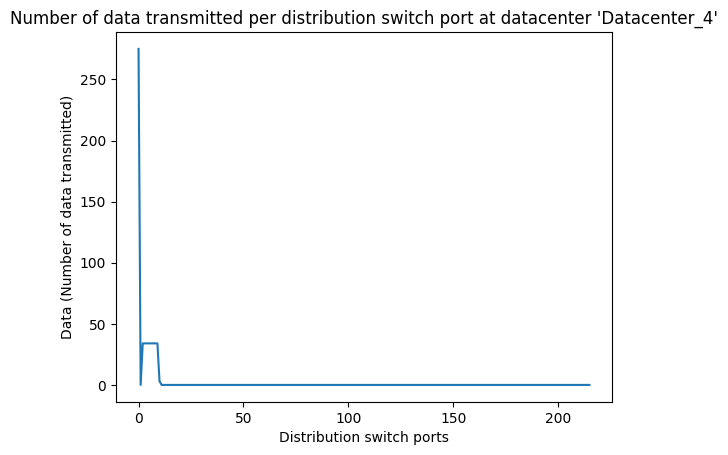

Cloud provider transmitts 1050.0 of data through its network.


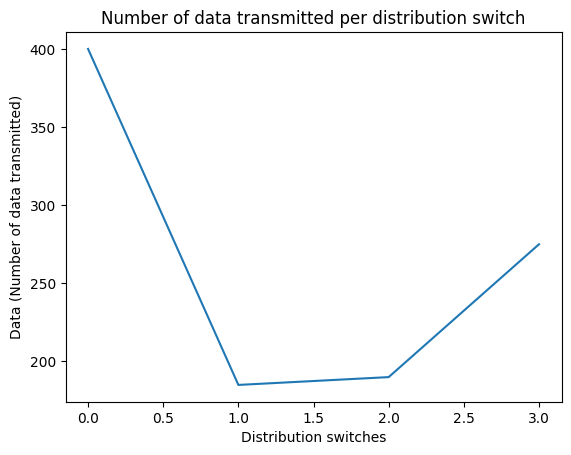

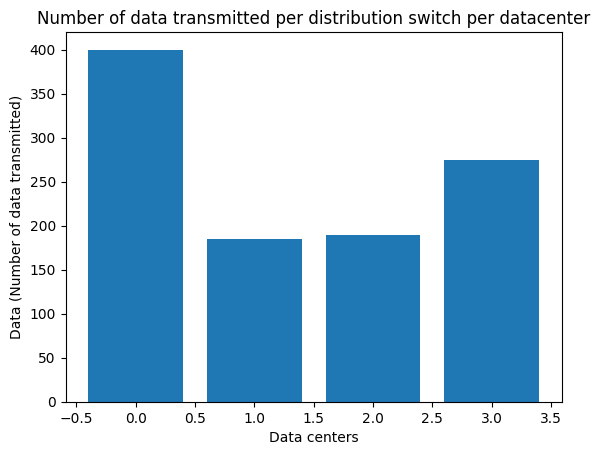

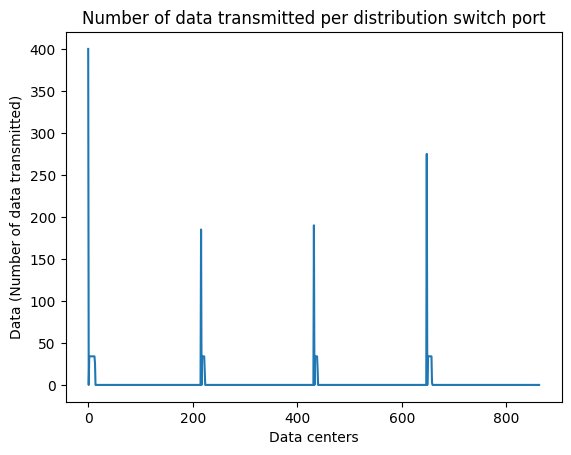

In [4]:
labels = np.unique(dataset['datacenter_name'])

# Distribution switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "distribution switch")].iterrows():
        # print(sample['traffic_history'].split(":"))
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.plot(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per distribution switch")
    plt.xlabel("Distribution switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per distribution switch at datacenter '{datacenter_name}'")
    plt.show()

# Distribution switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "distribution switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[7].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per distribution switch port")
    plt.xlabel("Distribution switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per distribution switch port at datacenter '{datacenter_name}'")
    plt.show()

# Distribution switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per distribution switch")
plt.xlabel("Distribution switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per distribution switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch per datacenter")
plt.show()

# Distribution switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per distribution switch port")
plt.show()

#### Core switches

Datacenter_1 transmitts 400.0 of data through the network.


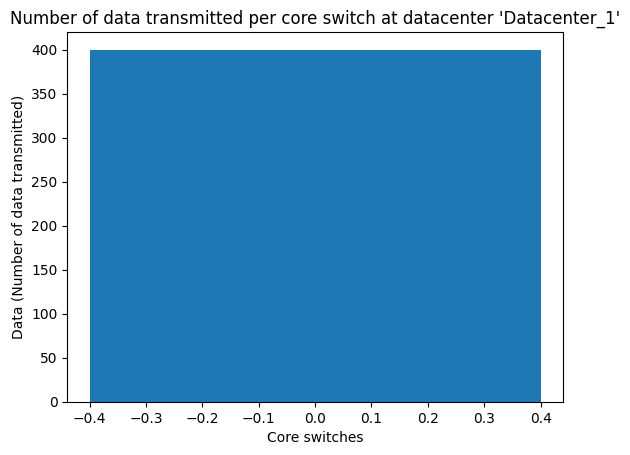

Datacenter_2 transmitts 185.0 of data through the network.


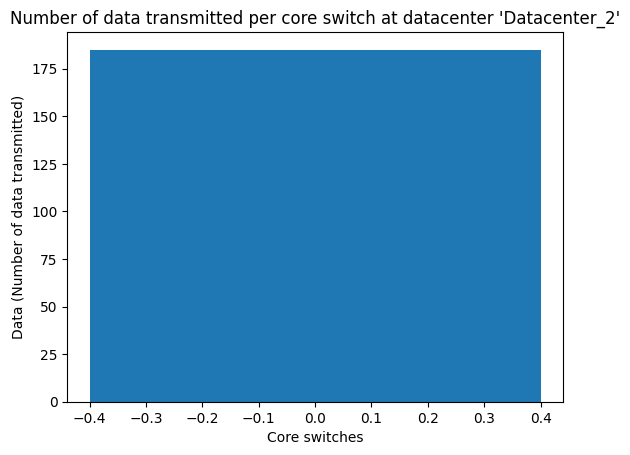

Datacenter_3 transmitts 190.0 of data through the network.


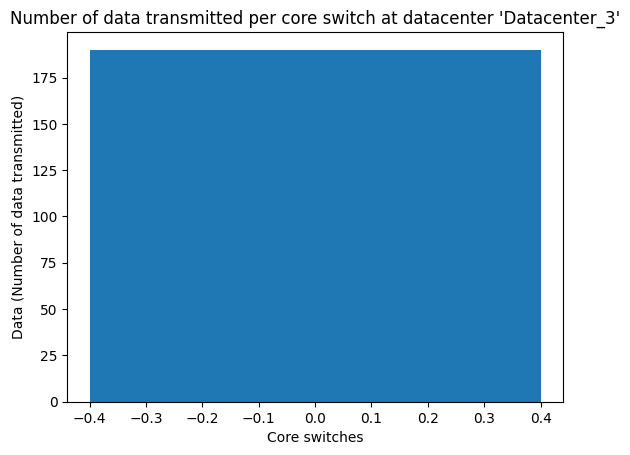

Datacenter_4 transmitts 275.0 of data through the network.


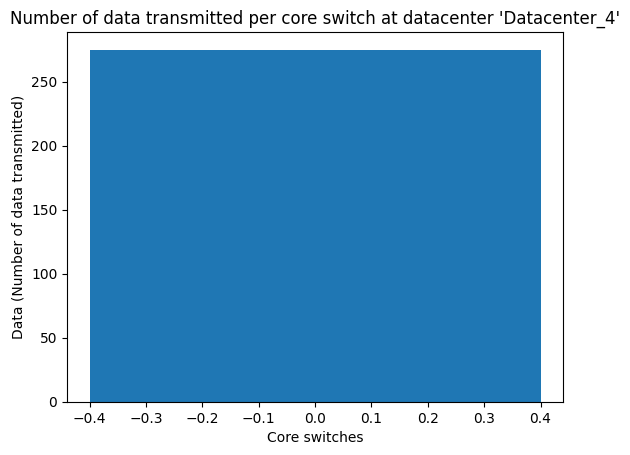

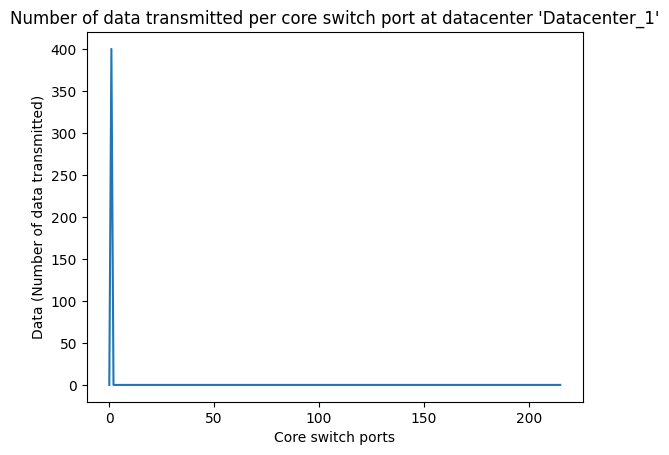

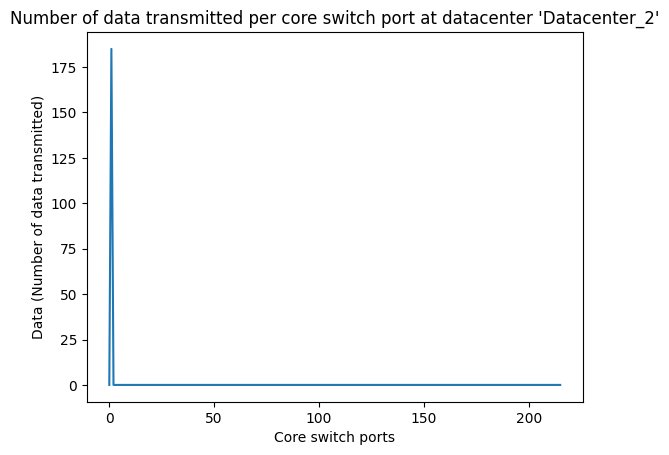

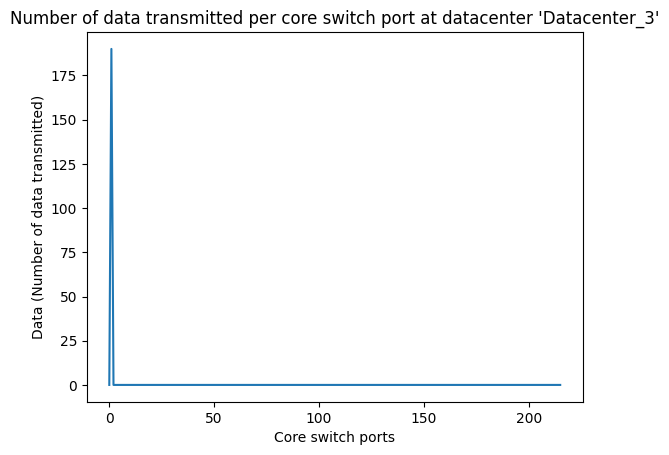

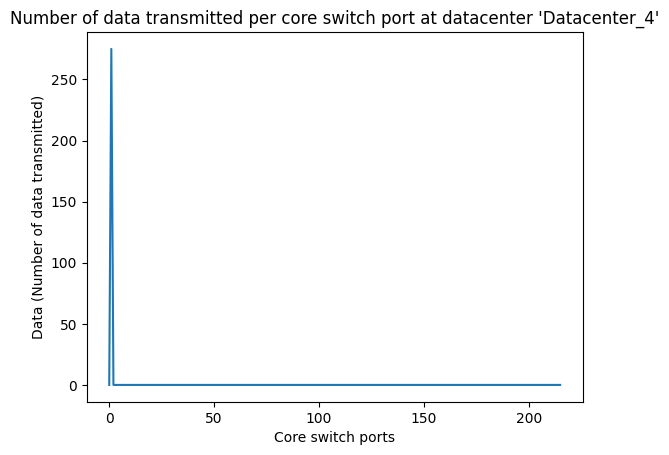

Cloud provider transmitts 1050.0 of data through its network.


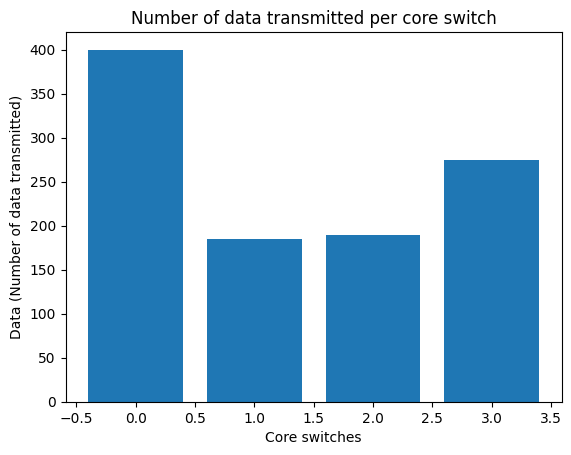

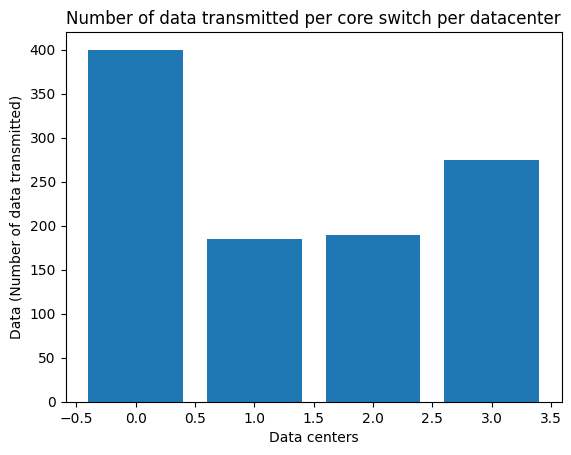

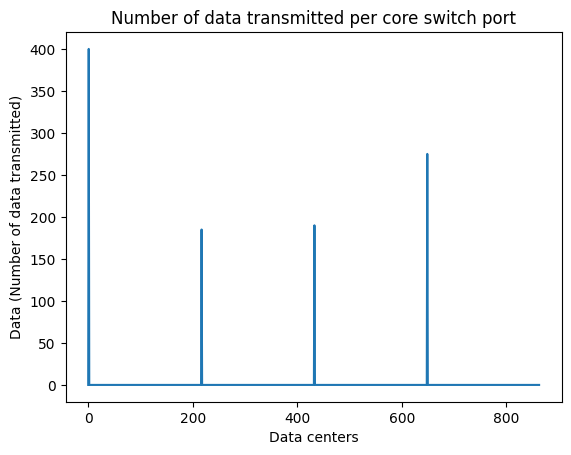

In [5]:
labels = np.unique(dataset['datacenter_name'])

# Core switch
cloud_provider_network_traffic_per_datacenter = np.array([])
cloud_provider_network_traffic_per_switch = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "core switch")].iterrows():
        if pd.notna(sample['traffic_history']):
            network_traffic = len(sample['traffic_history'].split(":")) - 1
            datacenter_network_traffic = np.append(datacenter_network_traffic, network_traffic)
            cloud_provider_network_traffic_per_switch = np.append(cloud_provider_network_traffic_per_switch, network_traffic)
    cloud_provider_network_traffic_per_datacenter = np.append(cloud_provider_network_traffic_per_datacenter, np.sum(datacenter_network_traffic))
    
    print(f"{datacenter_name} transmitts {np.sum(datacenter_network_traffic)} of data through the network.")
    plt.bar(np.arange(len(datacenter_network_traffic)), datacenter_network_traffic, label="Traffic per core switch")
    plt.xlabel("Core switches")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per core switch at datacenter '{datacenter_name}'")
    plt.show()

# Core switch port
cloud_provider_network_traffic_per_switch_per_port = np.array([])
for datacenter_name in labels:
    datacenter_network_traffic_per_switch_per_port = np.array([])
    for index, sample in dataset[(dataset['datacenter_name'] == datacenter_name) & (dataset['role'] == "core switch")].iterrows():
        if pd.notna(sample['ports']):
            ports = sample['ports'].split(":") # ports: id, is_active, active_duration, switch_id, host_id, bandwidth, total_used_bandwidth, traffic_history
            for port in ports:
                port_info = port.split(",")
                if len(port_info) > 1:
                    port_traffic_history = port_info[7].split("-")
                    network_traffic = len(port_traffic_history) - 1
                    datacenter_network_traffic_per_switch_per_port = np.append(datacenter_network_traffic_per_switch_per_port, network_traffic)
                    cloud_provider_network_traffic_per_switch_per_port = np.append(cloud_provider_network_traffic_per_switch_per_port, network_traffic)
    
    plt.plot(np.arange(len(datacenter_network_traffic_per_switch_per_port)), datacenter_network_traffic_per_switch_per_port, label="Traffic per core switch port")
    plt.xlabel("Core switch ports")
    plt.ylabel("Data (Number of data transmitted)")
    plt.title(f"Number of data transmitted per core switch port at datacenter '{datacenter_name}'")
    plt.show()

# Core switch
print(f"Cloud provider transmitts {np.sum(cloud_provider_network_traffic_per_switch)} of data through its network.")
plt.bar(np.arange(len(cloud_provider_network_traffic_per_switch)), cloud_provider_network_traffic_per_switch, label="Traffic per core switch")
plt.xlabel("Core switches")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch")
plt.show()

plt.bar(np.arange(len(cloud_provider_network_traffic_per_datacenter)), cloud_provider_network_traffic_per_datacenter, label="Traffic per core switch")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch per datacenter")
plt.show()

# Core switch port
plt.plot(np.arange(len(cloud_provider_network_traffic_per_switch_per_port)), cloud_provider_network_traffic_per_switch_per_port, label="Traffic per core switch port")
plt.xlabel("Data centers")
plt.ylabel("Data (Number of data transmitted)")
plt.title(f"Number of data transmitted per core switch port")
plt.show()